In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [225]:
df = pd.read_csv("..\\input\\nba\\2018.csv")
len(df)

883

In [226]:
df_clean = df[~df.line_team.isna()]
len(df_clean)

877

In [227]:
df_clean.head()

,date,away,away_fgm,away_fga,away_tpm,away_tpa,away_ftm,away_fta,away_oreb,away_dreb,...,home_oreb,home_dreb,home_assists,home_steals,home_blocks,home_turnovers,home_fouls,home_points,line_team,line_spread
2,2018-10-17 00:00:00,mil,42,85,14,34,15,20,11,46,...,9,32,21,8,9,11,19,112,mil,-3.5
3,2018-10-17 00:00:00,brk,40,82,5,27,15,22,5,34,...,14,32,21,5,5,14,20,103,det,-6.0
4,2018-10-17 00:00:00,nop,52,98,10,25,17,22,14,40,...,8,29,21,8,7,11,22,112,hou,-8.0
5,2018-10-17 00:00:00,mem,25,84,10,29,23,28,7,21,...,13,44,29,2,7,20,24,111,ind,-7.5
6,2018-10-17 00:00:00,den,33,87,8,24,33,42,14,42,...,9,38,21,3,9,12,32,98,den,-2.5


In [228]:
def get_winner(row):
    if row.away_points > row.home_points:
        return row.away
    else:
        return row.home
    
def is_line_correct(row):
    if row.winner != row.line_team:
        return False
    
    real_diff = abs(row.away_points - row.home_points)
    pred_diff = abs(row.line_spread)
    
    return real_diff >= pred_diff
    
df_clean["winner"] = df_clean.apply(get_winner, axis=1)
df_clean["line_correct"] = df_clean.apply(is_line_correct, axis=1)
df_clean["diff"] = (df_clean.away_points - df_clean.home_points).apply(lambda x: abs(x))
df_clean["line_spread"] = df_clean.line_spread.apply(lambda x: abs(x))

C:\Users\lsimu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\lsimu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\lsimu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [229]:
df_clean[["away","away_points","home","home_points", "winner", "line_team", "diff", "line_spread", "line_correct"]].head()

,away,away_points,home,home_points,winner,line_team,diff,line_spread,line_correct
2,mil,113,cho,112,mil,mil,1,3.5,False
3,brk,100,det,103,det,det,3,6.0,False
4,nop,131,hou,112,nop,hou,19,8.0,False
5,mem,83,ind,111,ind,ind,28,7.5,True
6,den,107,lac,98,den,den,9,2.5,True


In [230]:
df_clean.line_correct.mean()

0.50513112884834666

In [231]:
(df_clean.line_team == df_clean.winner).mean()

0.67046750285062717

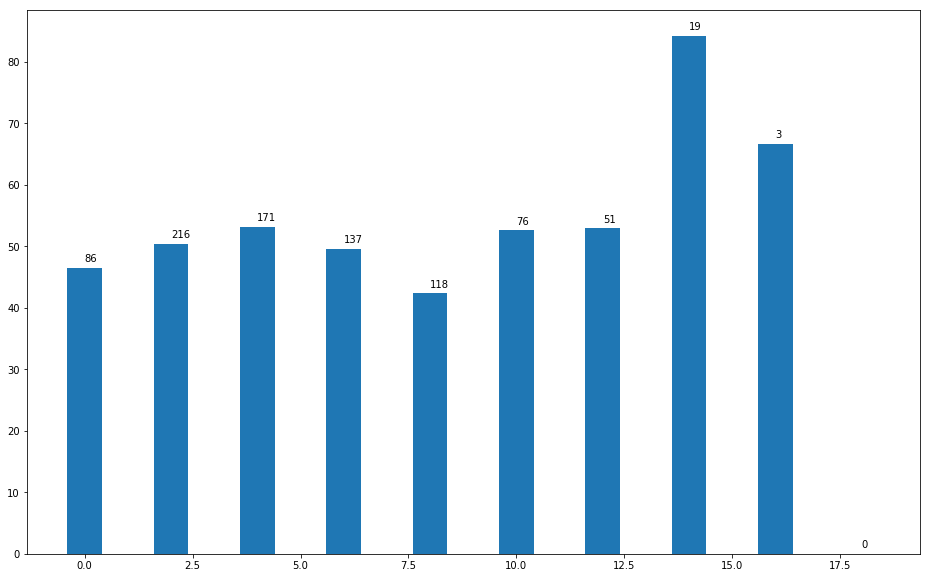

In [238]:
def win_pct(df, b1, b2):
    subset = df[(df.line_spread >= b1) & (df.line_spread < b2)]
    return (subset.line_correct.mean(), len(subset))


pcts = []
xs = []
lengths = []
for x in range(0, 20, 2):
    xs.append(abs(x))
    pct,length = win_pct(df_clean, x, x+2)
    if math.isnan(pct):
        pct = 0
    pcts.append(pct * 100)
    lengths.append(length)
    
plt.figure(figsize=(16,10))
plt.bar(height=pcts, x=xs);

for i, pos in enumerate(xs):
    val = pcts[i]
    plt.text(pos, val + 1, lengths[i])

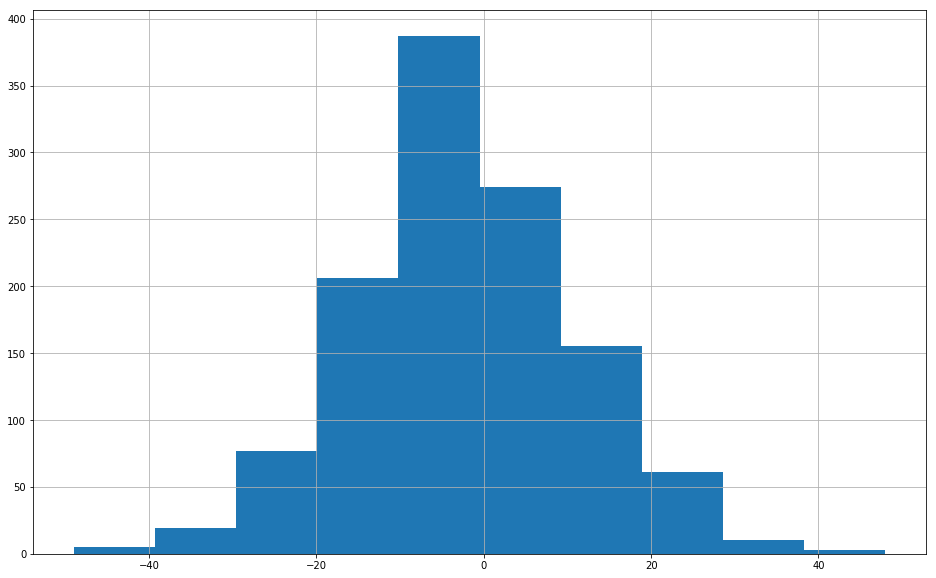

In [224]:
(df_clean["away_points"] - df_clean["home_points"]).hist(figsize=(16,10));

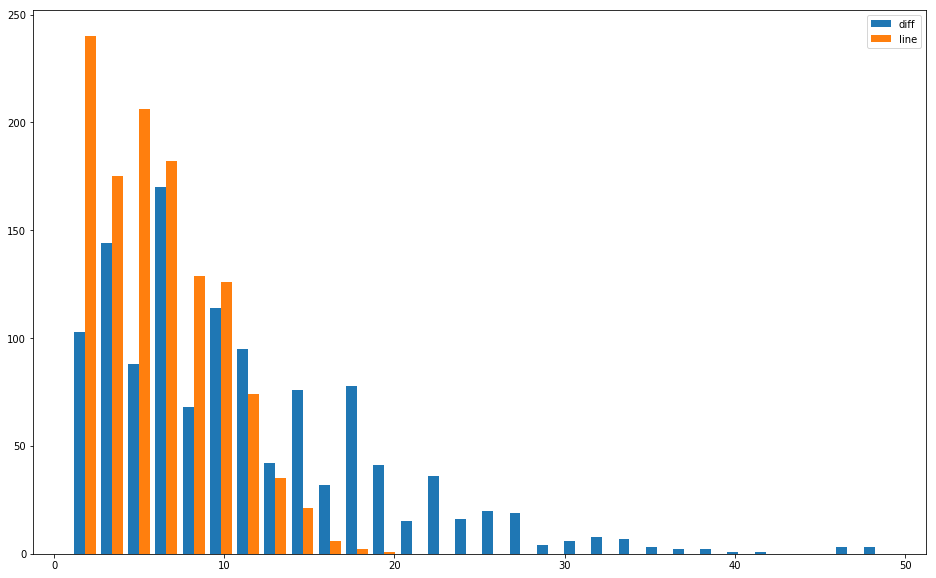

In [206]:
line_spread = df_clean.line_spread
diff_spread = df_clean["diff"]

plt.figure(figsize=(16,10))
plt.hist([diff_spread, line_spread], 30, label=['diff', 'line']);
plt.legend(loc='upper right');

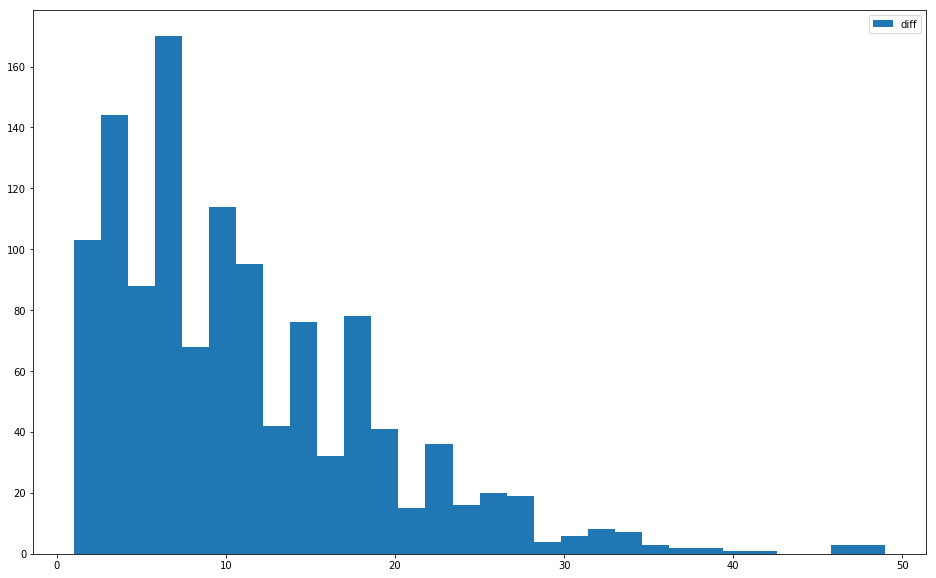

In [98]:
plt.figure(figsize=(16,10))
plt.hist([diff_spread], 30, label=['diff']);
plt.legend(loc='upper right');

- what do histograms look like for cases when lines are wrong
- same as above but for cases when lines are correct